In [0]:
# https://www.kaggle.com/alpertemel/fraud-data-93-accuracy (머신러닝 참고 코드)


https://www.kaggle.com/mlg-ulb/creditcardfraud
- Anonymized credit card transactions labeled as fraudulent or genuine


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 목표
- 우리에게 제공되는 데이터를 이해하자!
- 사기와 Non-사기 비율을 만들자
- 우리가 사용할 분류들을 결정하고 정확도 높은 것을 결정하자!
- 인공신경망을 만들고 어떤 모델이 최고인지 비교해보자!

## 1. 우리의 데이터 셋을 이해하라
## 2. 전처리
- scaling 진행
- 데이터를 쪼개자

## 3. Undersampling과 Oversampling을 랜덤화하자

## 4. Testing을 진행하자
- (머신러닝) Logistic Regression으로 테스팅하자
- (딥러닝)Neural Networks으로 테스팅하자!
(Undersampling vs Oversampling)

In [0]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/DA/금잘알_팀/data/creditcardfraud/creditcard.csv")

In [0]:
# 주요 라이브러리
import pandas as pd  # data precessing
import numpy as np   # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### 변수설명
- Time
  - 첫 번째 데이터셋 사이에 소요된 시간
- V1~V28
  - 사용자 ID 및 민감한 기능을 보호하기 위해 PCA 차원 축소 결과
- Amount
  - 거래량
- Class
  - 1은 사기거래
  - 0은 No 사기거래

### target Class 확인

Text(0, 0.5, 'Frequency')

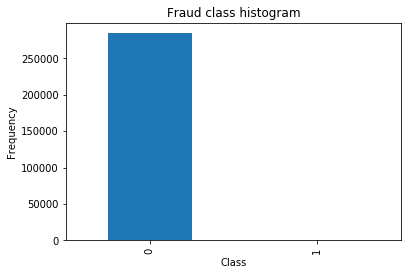

In [0]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

### 우리의 input과 target 변수를 세팅 + resampling


In [0]:
data.Amount.head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [0]:
fraud = data.loc[data["Class"] == 1]
fraud
not_fraud = data.loc[data["Class"] == 0]
not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [0]:
not_fraud.Amount.value_counts()

1.00       13575
1.98        6044
0.89        4872
9.99        4746
15.00       3280
           ...  
1814.33        1
243.99         1
653.92         1
719.61         1
635.57         1
Name: Amount, Length: 32701, dtype: int64

In [0]:
yeni_not_fraud = not_fraud.iloc[0:1,:]
yeni_not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [0]:
import random

while len(yeni_not_fraud) < 492:
  i = random.randrange(0, len(not_fraud))
  yeni_not_fraud = pd.concat([not_fraud.iloc[i:i+1, :], yeni_not_fraud], axis= 0)
## not_fraud인 행들을 random으로 생성하여 총 492개 만들자!

In [0]:
yeni_not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102145,68068.0,1.156495,0.094441,0.066630,1.049178,-0.344541,-0.364676,-0.259167,0.127156,0.816461,-0.774144,-0.420497,-0.528127,-1.721599,-1.232043,0.185337,-0.116572,1.500643,-0.225769,-0.365218,-0.203164,-0.170498,-0.288604,-0.046917,-0.015862,0.423243,0.445714,0.007843,0.036450,12.31,0
265071,161725.0,0.139373,1.019850,-0.423320,-0.555768,0.941496,-0.732687,0.962232,-0.078788,-0.033887,-0.841801,-0.685826,-0.158905,-0.084083,-0.995069,-0.179301,0.287550,0.415526,-0.282036,-0.287935,0.010606,-0.338328,-0.824810,0.102578,0.496757,-0.434156,0.119641,0.224406,0.083331,4.86,0
185056,126503.0,-0.421314,0.994937,0.040629,-0.575132,0.324193,-1.072795,0.868506,-0.037285,-0.054979,-0.333029,-0.854337,0.441498,0.456107,0.105692,-0.393805,-0.136857,-0.321454,-0.879808,-0.147756,-0.087757,-0.250081,-0.490462,0.193220,-0.012033,-0.479601,0.107427,-0.154365,-0.203250,11.98,0
60932,49570.0,-1.099416,1.471099,1.039690,-0.396307,0.235802,-0.500986,0.899870,-0.238280,0.607586,1.348844,1.263442,-0.280344,-1.158807,-0.714209,0.473020,0.485189,-0.537709,0.490980,0.218287,0.703203,-0.475862,-0.770751,-0.081073,-0.095685,-0.030603,0.040486,0.322296,-0.093708,10.74,0
279378,168829.0,-0.471395,0.117007,0.064065,-0.877967,2.481675,4.094197,-0.631752,1.094672,0.055309,-0.269050,-0.288924,-0.155921,-0.056947,-0.007489,1.214871,-0.192140,-0.312090,0.309577,0.513029,0.039201,0.341735,1.033675,-0.261730,0.782452,-0.411162,0.613595,0.093717,0.145091,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122799,76692.0,-0.322859,0.896722,1.230695,-0.058664,0.582556,-0.709711,0.869223,-0.276177,-0.276392,-0.308315,-0.520493,-0.081851,0.673225,-0.758694,0.916373,0.432105,-0.315974,-0.042143,0.110798,0.291040,-0.328005,-0.731541,-0.076694,-0.192516,-0.089057,0.074876,0.076174,-0.125639,12.99,0
263956,161197.0,2.008877,0.016315,-1.807896,0.584480,0.309032,-0.622639,-0.062992,-0.063535,0.662677,-0.496032,0.735688,0.431930,-0.662794,-1.427969,-0.998046,0.388988,0.928919,0.768210,0.248910,-0.197986,-0.006669,0.253523,-0.011334,-0.547285,0.082987,0.650701,-0.044725,-0.046018,3.99,0
170960,120428.0,1.393089,-2.291452,-1.006216,-0.970845,-1.618126,-0.725129,-0.288054,-0.248785,0.518345,0.126569,-1.058502,0.337111,0.184334,-0.142695,0.097907,-1.711628,0.198871,0.544498,-0.225801,0.183816,-0.556942,-1.815765,0.207856,-0.112321,-0.882293,0.166307,-0.090862,0.021019,398.68,0
270182,163952.0,2.074446,-0.051311,-1.125447,0.381088,-0.071318,-1.129921,0.180242,-0.325239,0.552013,0.073988,-0.873378,0.388967,0.087984,0.266710,0.050873,-0.062213,-0.341628,-0.821477,0.202029,-0.221584,-0.299535,-0.725924,0.322798,-0.110465,-0.278422,0.205186,-0.070767,-0.061594,0.89,0


In [0]:
yeni_df = pd.concat([fraud, yeni_not_fraud], axis = 0)
yeni_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122799,76692.0,-0.322859,0.896722,1.230695,-0.058664,0.582556,-0.709711,0.869223,-0.276177,-0.276392,-0.308315,-0.520493,-0.081851,0.673225,-0.758694,0.916373,0.432105,-0.315974,-0.042143,0.110798,0.291040,-0.328005,-0.731541,-0.076694,-0.192516,-0.089057,0.074876,0.076174,-0.125639,12.99,0
263956,161197.0,2.008877,0.016315,-1.807896,0.584480,0.309032,-0.622639,-0.062992,-0.063535,0.662677,-0.496032,0.735688,0.431930,-0.662794,-1.427969,-0.998046,0.388988,0.928919,0.768210,0.248910,-0.197986,-0.006669,0.253523,-0.011334,-0.547285,0.082987,0.650701,-0.044725,-0.046018,3.99,0
170960,120428.0,1.393089,-2.291452,-1.006216,-0.970845,-1.618126,-0.725129,-0.288054,-0.248785,0.518345,0.126569,-1.058502,0.337111,0.184334,-0.142695,0.097907,-1.711628,0.198871,0.544498,-0.225801,0.183816,-0.556942,-1.815765,0.207856,-0.112321,-0.882293,0.166307,-0.090862,0.021019,398.68,0
270182,163952.0,2.074446,-0.051311,-1.125447,0.381088,-0.071318,-1.129921,0.180242,-0.325239,0.552013,0.073988,-0.873378,0.388967,0.087984,0.266710,0.050873,-0.062213,-0.341628,-0.821477,0.202029,-0.221584,-0.299535,-0.725924,0.322798,-0.110465,-0.278422,0.205186,-0.070767,-0.061594,0.89,0


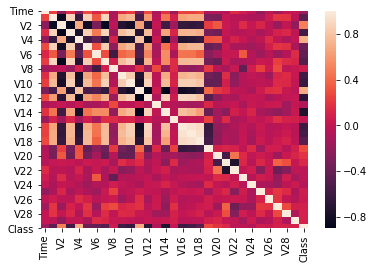

In [0]:
corr_yeni = yeni_df.corr()
sns.heatmap(corr_yeni)

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [0]:
yeni_df['scaled_amount'] = rob_scaler.fit_transform(yeni_df["Amount"].values.reshape(-1,1))
yeni_df['scaled_time'] = rob_scaler.fit_transform(yeni_df['Time'].values.reshape(-1,1))

yeni_df.drop(['Time', 'Amount'], axis = 1, inplace=True)
yeni_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.178611,-0.924142
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,5.199044,-0.923407
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,2.260445,-0.878972
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.421165,-0.850863
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.168446,-0.844927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122799,-0.322859,0.896722,1.230695,-0.058664,0.582556,-0.709711,0.869223,-0.276177,-0.276392,-0.308315,-0.520493,-0.081851,0.673225,-0.758694,0.916373,0.432105,-0.315974,-0.042143,0.110798,0.291040,-0.328005,-0.731541,-0.076694,-0.192516,-0.089057,0.074876,0.076174,-0.125639,0,-0.046559,-0.074566
263956,2.008877,0.016315,-1.807896,0.584480,0.309032,-0.622639,-0.062992,-0.063535,0.662677,-0.496032,0.735688,0.431930,-0.662794,-1.427969,-0.998046,0.388988,0.928919,0.768210,0.248910,-0.197986,-0.006669,0.253523,-0.011334,-0.547285,0.082987,0.650701,-0.044725,-0.046018,0,-0.138050,0.866543
170960,1.393089,-2.291452,-1.006216,-0.970845,-1.618126,-0.725129,-0.288054,-0.248785,0.518345,0.126569,-1.058502,0.337111,0.184334,-0.142695,0.097907,-1.711628,0.198871,0.544498,-0.225801,0.183816,-0.556942,-1.815765,0.207856,-0.112321,-0.882293,0.166307,-0.090862,0.021019,0,3.874250,0.412510
270182,2.074446,-0.051311,-1.125447,0.381088,-0.071318,-1.129921,0.180242,-0.325239,0.552013,0.073988,-0.873378,0.388967,0.087984,0.266710,0.050873,-0.062213,-0.341628,-0.821477,0.202029,-0.221584,-0.299535,-0.725924,0.322798,-0.110465,-0.278422,0.205186,-0.070767,-0.061594,0,-0.169564,0.897225


In [0]:
scaled_amount = yeni_df['scaled_amount']
scaled_time = yeni_df['scaled_time']

yeni_df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)

In [0]:
yeni_df.insert(0, 'scaled_amount', scaled_amount)

In [0]:
yeni_df.insert(1,'scaled_time', scaled_time)

In [0]:
yeni_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.178611,-0.924142,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,5.199044,-0.923407,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,2.260445,-0.878972,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.421165,-0.850863,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.168446,-0.844927,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122799,-0.046559,-0.074566,-0.322859,0.896722,1.230695,-0.058664,0.582556,-0.709711,0.869223,-0.276177,-0.276392,-0.308315,-0.520493,-0.081851,0.673225,-0.758694,0.916373,0.432105,-0.315974,-0.042143,0.110798,0.291040,-0.328005,-0.731541,-0.076694,-0.192516,-0.089057,0.074876,0.076174,-0.125639,0
263956,-0.138050,0.866543,2.008877,0.016315,-1.807896,0.584480,0.309032,-0.622639,-0.062992,-0.063535,0.662677,-0.496032,0.735688,0.431930,-0.662794,-1.427969,-0.998046,0.388988,0.928919,0.768210,0.248910,-0.197986,-0.006669,0.253523,-0.011334,-0.547285,0.082987,0.650701,-0.044725,-0.046018,0
170960,3.874250,0.412510,1.393089,-2.291452,-1.006216,-0.970845,-1.618126,-0.725129,-0.288054,-0.248785,0.518345,0.126569,-1.058502,0.337111,0.184334,-0.142695,0.097907,-1.711628,0.198871,0.544498,-0.225801,0.183816,-0.556942,-1.815765,0.207856,-0.112321,-0.882293,0.166307,-0.090862,0.021019,0
270182,-0.169564,0.897225,2.074446,-0.051311,-1.125447,0.381088,-0.071318,-1.129921,0.180242,-0.325239,0.552013,0.073988,-0.873378,0.388967,0.087984,0.266710,0.050873,-0.062213,-0.341628,-0.821477,0.202029,-0.221584,-0.299535,-0.725924,0.322798,-0.110465,-0.278422,0.205186,-0.070767,-0.061594,0


In [0]:
x = yeni_df.iloc[:,0:30]
y = yeni_df.iloc[:,30:31]

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

### 머신러닝 모델

In [0]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_tahmin = rf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_tahmin = xgb.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# lightgbm
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
lgb_tahmin = lgb.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# 정확도 확인
from sklearn.metrics import accuracy_score, confusion_matrix

print("randomForest 정확도: ", accuracy_score(y_test, rf_tahmin))
print("xgboost 정확도: ", accuracy_score(y_test, xgb_tahmin))
print("lightgbm 정확도: ", accuracy_score(y_test, lgb_tahmin))

randomForest 정확도:  0.9292307692307692
xgboost 정확도:  0.9476923076923077
lightgbm 정확도:  0.9415384615384615


#### XGboost 사용하여 예측 실시

In [0]:
X = data.iloc[:, 0:30]
Y = data.iloc[:, 30:31]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 34)

In [0]:
xgb2 = XGBClassifier()
xgb2.fit(X_train, Y_train)
xgb2_tahmin = xgb2.predict(X_test)
accuracy_score(Y_test, xgb2_tahmin)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9994041729175311

### 딥러닝 모델

In [0]:
# https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow
#(딥러닝 모델)

df_full = pd.read_csv("/content/drive/My Drive/DA/금잘알_팀/data/creditcardfraud/creditcard.csv")
df_full.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
df_full.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
df_full.sort_values(by='Class', ascending=False, inplace=True)
df_full.drop('Time', axis=1,  inplace = True)

In [0]:
df_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,6.455828,-13.380222,0.545279,-13.026864,-0.453595,-13.251542,-22.883999,-9.287832,4.038231,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,1.904284,-4.002414,-0.936956,-2.801915,0.798328,-2.348740,-6.426734,-0.827308,1.732382,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,11.027059,-16.388054,0.363921,-17.230202,-0.437488,-10.122392,-13.639209,-4.986457,1.126784,1.455878,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,4.229154,-5.292314,-0.888087,-7.672250,0.547571,-4.307060,-5.701174,-1.772803,-0.193132,2.230735,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,4.221304,-6.119667,0.023014,-8.149322,-0.301352,-5.375283,-9.315001,-2.487563,2.355919,0.576379,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


In [0]:
# 3000개 sample data만 사용하여 실시
df_sample = df_full.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [0]:
# x와 y로 나누고, array형태로 두자.
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [0]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [0]:
train_feature = np.array(df_train.values[:, 0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [0]:
train_feature.shape

(2400, 29)

In [0]:
train_label.shape

(2400,)

In [0]:
# MinMaxScaler 실시 - feature만 실시
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 200)               6000      
_________________________________________________________________
dropout_19 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 479 samples, validate on 1921 samples
Epoch 1/200
 - 1s - loss: 0.6926 - acc: 0.5344 - val_loss: 0.68

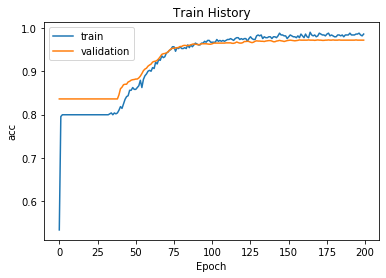

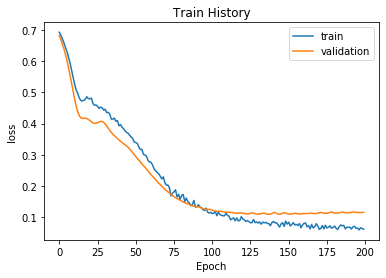

In [0]:
#Keras MLP 사용하여 deep learning model 실시
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt 

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential()

# 입력층
model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

# 은닉층
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

- 그래프를 보면 Epoch이 76쯤에서 값이 일정해지고, overfitting이 발생함을 알 수 있다.
- 따라서 Epoch을 76까지만 학습을 다시 실시

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 200)               6000      
_________________________________________________________________
dropout_21 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 479 samples, validate on 1921 samples
Epoch 1/75
 - 1s - loss: 0.6972 - acc: 0.3006 - val_loss: 0.687

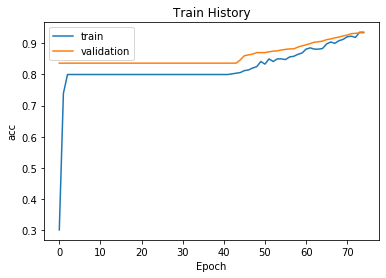

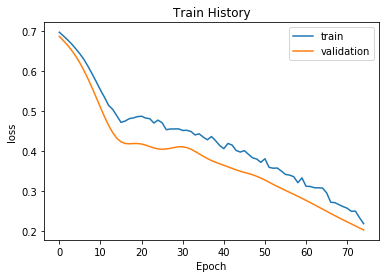

In [0]:
# epochs = 75까지 재실시
#Keras MLP 사용하여 deep learning model 실시
model = Sequential()

# layer1
model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

# layer2
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  
                          validation_split=0.8, epochs=75, 
                          batch_size=500, verbose=2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)

600/600 [==============================] - 0s 46us/step


accuracy= 0.955


In [0]:
prediction

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    